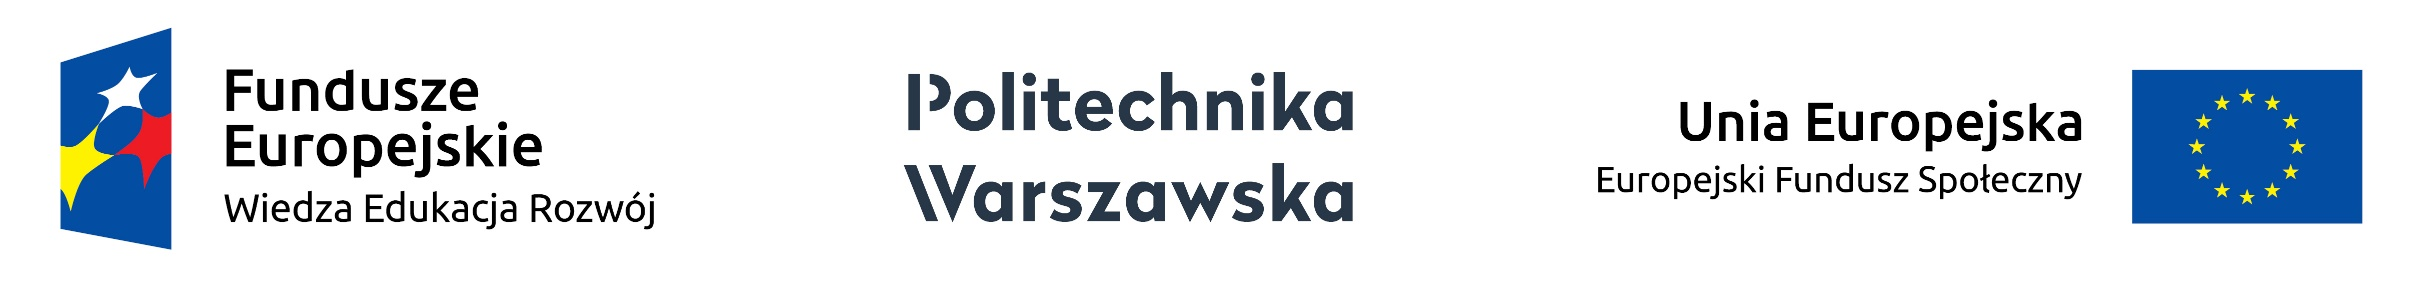

# Programming Language With Numerical Methods
<heads>
Joanna Kozuchowska, Msc
    
## Class 11. Working with files. String formatting

**Whenever you learn a new feature, you should try it out in interactive mode and make errors on purpose to see what goes wrong and what types of errors you run into.**

**Contents**<a id=contents></a>
1. [Reading and writing files](#read)<br>
    1.1 [Reading csv files](#csv)<br>
2. [String formatting](#str)<br>
   2.1. [General rules](#rules)<br>
   2.2. [% statement](#percent)<br>
   2.3. [`format` method](#format)<br>
   2.4. [f-string](#fstring)<br>
3. [Exercises](#exercises)
 
 
**Additional materials**
1. Working with files
- Methods of File objects, Python tutorial: https://docs.python.org/3/tutorial/inputoutput.html#methods-of-file-objects
- More on NumPy data loading methods: https://likegeeks.com/numpy-loadtxt-tutorial/
2. Text formatting:
    - f-string: https://www.python.org/dev/peps/pep-0536/, https://www.geeksforgeeks.org/formatted-string-literals-f-strings-python/, 
    - str.format: https://docs.python.org/3/library/string.html#string-formatting
    - string formatting: https://docs.python.org/2/library/stdtypes.html#string-formatting
    - `=` operator in Python 3.8: https://www.geeksforgeeks.org/new-operator-in-python3-8-f-string/

## Reading and writing files <a id=read></a>

#### Writing data to files
- `f.write()`
- `f.writelines()`

In [1]:
with open("new1.txt", "w") as f:
    f.write("hello\n")
    f.writelines([str(5.03)]*5)

In [2]:
with open("new2.txt", "w") as f:
    print("hello\n", file=f)

#### Reading data from files
- `f.read()` 
- `f.readline()`
- `f.readlines()`

In [4]:
file = open("new1.txt")

# whole file at once
whole = file.read(10)
print("10 characters", whole)
# windows: \r\n Mac: \n
line = file.readline()
print("repr", repr(line))
line = file.readline()
line = line.strip()
print("repr2", repr(line))

10 characters 'hello\n5.03'
repr '5.035.035.035.03'
repr2 ''


In [20]:
file = open("new.txt")
line = file.readline()
while line != '':
    line= file.readline()
    print(line)

spam

spam spam eggs

fadlg

skghag

fakfgnad




In [21]:
file = open("new.txt")
lines = file.readlines()
print(lines)

['eggs\n', 'spam\n', 'spam spam eggs\n', 'fadlg\n', 'skghag\n', 'fakfgnad\n']


#### Reading file using a file iterator

In [30]:
with open("new.txt", "r") as f:
    for line in f:
        data = line.strip().split(",")
        print(data)

['name', 'lname', 'age']
['Paul', 'Smith', '23']
['Anna', 'Jones', '43']


In [22]:
file = open("new.txt")
for line in file:
    print(line)
file.close()

eggs

spam

spam spam eggs

fadlg

skghag

fakfgnad



### Reading csv files <a id=csv></a>
There are several methods to read the `csv` file (csv - comma-separated values), tabularic data delimited usually with a comma, or, less often with a semicolon.

In [14]:
data_to_save = ["name,lname,age", "Paul,Smith,23", "Anna,Jones,43"]

#### Using `np.genfromtxt`
The limitation of `genfromtxt` is that it would skip the data of different type - by default, every value read is treated as float, unless defined otherwise (with datatype parameter);

In [22]:
import numpy as np

data = np.genfromtxt("new_file.csv", delimiter=",", skip_header=1)
print(data)

[[nan nan 23.]
 [nan nan 43.]]


In [21]:
import numpy as np

# read every value as str
data = np.genfromtxt("new_file.csv", delimiter=",", dtype='str', skip_header=1, encoding='utf8')
print(data)

[['Paul' 'Smith' '23']
 ['Anna' 'Jones' '43']]


`genfromtxt` is also able to return each column separately for further processing, instead of keeping all the data in the array: just define the `unpack` parameter to `True`.

In [23]:
first_names, last_names, age = np.genfromtxt("new_file.csv", delimiter=",", unpack=True, skip_header=1, dtype='str',)
print(first_names)

['Paul' 'Anna']


In [20]:
# saving tabular data to a file
# providing the format: fmt, since we save mixed data
np.savetxt("new_file_np.csv", data, 
           fmt='%s %s %d', 
           delimiter=',',
           newline='\n',
            header='name,lname,age',
          comments='') 
# by default, numpy adds # to header, redefine comments to skip it; 
# also, by default line with # in the beginning is skipped while reading with genfromtxt

#### Using generic file-reading methods

In [10]:
# reading files
with open("new_file.csv", "r") as f:
    lines = f.readlines() # read the whole file into separate lines
    
# divide the lines into individual elements, get rid of the newline character at the end of the line
lines = [line.strip().split(",") for line in lines]
print(lines)
# can be casted to an np.array if needed

[['name', 'lname', 'age'], ['Paul', 'Smith', '23'], ['Anna', 'Jones', '43']]


In [27]:
# writing files
data = [['name', 'lname', 'age'], ['Paul', 'Smith', '23'], ['Anna', 'Jones', '43']]
# writelines does not include a newline character, so first, we need to add it to data; 
# also, join the values with comma
data_to_save = [",".join(line) + "\n" for line in data]

with open("new_file_standard.csv", "w") as f:
    lines = f.writelines(data_to_save)  

#### Using `csv` module

In [11]:
import csv

with open("new_file.csv", "r") as f:
    csvr = csv.reader(f)
    for line in csvr:
        print(line)

['name', 'lname', 'age']
['Paul', 'Smith', '23']
['Anna', 'Jones', '43']


#### Using `pandas` module

Pandas reads csv data into its own data structure called `DataFrame`. If we do not want to use`DataFrame`, we can cast it to list or some other structure.

In [29]:
import pandas as pd

data = pd.read_csv("new_file.csv")
names = list(data["name"])
print(names)

['Paul', 'Anna']


In [40]:
# write data
# first, the data needs to be transformed to DataFrame, as saving to csv is a method of a DataFrame object
data = [['name', 'lname', 'age'], ['Paul', 'Smith', '23'], ['Anna', 'Jones', '43']]
# parameter columns define names of columns
data_to_pd = pd.DataFrame(data[1:], columns=data[0]) 

data_to_pd.to_csv("new_file_pd.csv", 
                  index=False, #skip index of rows
                 )

In [41]:
# check how the DataFrame looks
data_to_pd.head()

,name,lname,age
0,Paul,Smith,23
1,Anna,Jones,43


## String formatting <a id=str></a>

### % operator <a id=percent></a>
Formatting with `%` is the oldest available method. It allows to do simple positional formatting. As in example below, a string, which includes a format specifier (`%s` and `%.4f`), is followed with a `%` operator and variable names given as a tuple (because it takes only one argument). The first variable is put in place of the first formatter and so on.

Instead of positional matching, variables can be matched using aliases, see more details here: https://docs.python.org/3/library/stdtypes.html#old-string-formatting

*% operator is not recommended.*

In [1]:
variable = 0.1
name = "Alice"
print("Name of person: %s, fraction: %.4f" %(name, variable))
print("Hi, my name is %s!" % name)

Name of person: Alice, fraction: 0.1000
Hi, my name is Alice!


### `format` method <a id=format></a>

Python 3 introduced a new approach to string formatting - a `format` method. Formatting is done by calling the `format` method on a string object.

Again, the arguments can be taken positionally, you can refer to them using indices or aliases or `**` to unpack dictionaries

Some more information on formatting: https://realpython.com/python-formatted-output/

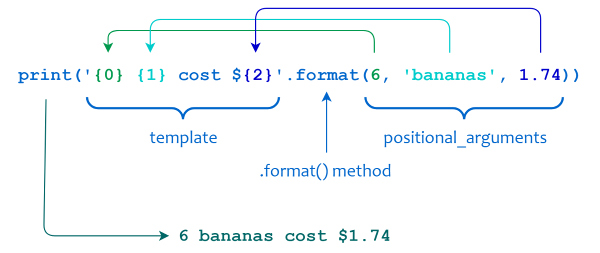
(Source: https://realpython.com/python-formatted-output/)

In [21]:
variable = 0.1
name = "Alice"
print("Name of person: {}, fraction: {}".format(name, variable))

Name of person: Alice, fraction: 0.1


In [29]:
name, price = "Alice", 32.52
print("Hello, {}! You need to pay {} dollars!".format(name, price))

Hello, Alice! You need to pay 32.52 dollars!


In [25]:
print("Name of person: {:^8s}, fraction: {:10.4f}".format(name, variable)) # some formatting specifier

Name of person:  Alice  , fraction:     0.1000


In [24]:
# switch elements
print("Name of person: {0}, fraction: {0}".format(name, variable))

Name of person: Alice, fraction: Alice


In [62]:
# using substitutions for variable names
print("Name of person: {name:.>30.20s}, fraction: {var:01f}".format(name=name, var=0.87))

Name of person: .........................Alice, fraction: 0.870000


In [32]:
countries = {'country': 'Poland', 'capital': 'Warsaw'}
print("The capital of {country} is {capital}.".format(**countries))

The capital of Poland is Warsaw.


### f-string <a id=fstring></a>
Starting with Python 3.6, a new method of string formatting is available called **formatted string literals** or **f-strings**. This approach allows to use embedded Python expressions inside string constants.

**To use the f-string, prefix the string with letter f.** The syntax inside a string is similar to `format` method, but f-strings are faster than the previously mentioned methods.

Apart from including variables, we can do some arithmetic or call functions inside the expression (see examples below) - everything that is enclosed in braces is treated as an expression.

Limitations of f-strings:
- the braces can't be empty (`f"aa{}bb"` won't work),
- f-strings cannot contain a backslash (`\`) characters - which is sometimes used to escape some characters or to introduce a newline character, or tab space; a workaround uses a variable which includes this character.

More information on f-strings: https://docs.python.org/3/reference/lexical_analysis.html#f-strings

In [ ]:
variable = 0.1
name = "Alice"

In [63]:
print(f"Name of person: {name}, {variable}")

Name of person: Alice, 0.1


In [45]:
print(f"Name of person: {name:^10s}, fraction: {variable:08.4f}")

Name of person:   Alice   , fraction: 000.1000


In [24]:
import math as m

print(f"2 + 2 = {2+2}")
print(f"sin(pi) = {m.sin(m.pi/2)}")
name = "ANNA SMITH"
print(f"{name.title()}")

2 + 2 = 4
sin(pi) = 1.0
Anna Smith


In [37]:
# careful with quotation marks
countries = {'country': 'Poland', 'capital': 'Warsaw'}
print(f"The capital of {countries['country']} is {countries['capital']}.")
# print(f"Capital of {countries["country"]} is {countries["capital"]}.") #won't work
# print(f"Capital of {countries[\"country\"]} is {countries[\"capital\"]}.") #won't work

The capital of Poland is Warsaw.


In [28]:
# workaround fro backslash limitations:
nl = '\n'
print(f'line_1{nl}line_2')

line_1
line_2


### Named f-string
From version 3.8, an adjustment to f-string is available -- a named f-string. The idea is to include the name of the variable along its value. New syntax requires an additional `=` operator in the string constant, but the rest remains the same.

In [18]:
variable = 0.1
name = "Alice"
print(f"Name of person: {name=}, {variable=}")
print(f"Name of person: {name=:>10s}, {variable=:4.2f}")

Name of person: name='Alice', variable=0.1
Name of person: name=     Alice, variable=0.10


### Format specifiers <a id=rules></a>
Format specifiers define the result of the formatting. They let control the fill character, alignment, width and precision of the data that is inserted in the replacement field.

```:[[<fill>]<align>][<sign>][#][0][<width>][<group>][.<prec>][<type>] ```

The components of the format specifier are:

- `:` - separates the format specifier from the rest of the replacement field, e.g. the name of the variable, alias or index,
- `fill` - defines how to pad values that do not take the entire `width`, ignored, if the output occupied the entire field width,
- `align` - defines how to justify values that do not take the entire `width`,
- `sign` - specifies if the sign of the number is included for numeric values,
- `#` - defines an alternate output form depending on the presentation types,
- `0` - values are padded on the left with `0` instead of another ASCII characters,
- `width` - defines the **minimum** width of the output field,
- `group` - defines a grouping character for numeric output (like a thousands separator),
- `.prec` - specifies: (1) the number of decimal digits in a floating point number, (2) the maximum output width for string types,
- `type` - defines the presentation type (type of conversion performed on the argument);


| component | value | description |
| :-: | :-: | :- |
|align | < | left-aligned (default for strings)
|align | > | right-aligned
|align | \^ | centered
|align | = | only for numeric values when sign is included 
|fill |  | any character can be used to fill the extra space (except for curly braces)
|sign | + | the displayed value is always displayed with a leading sign (both positive and negative values)
|width| `<number>` | the minimum width of the output field, defined with a number
|group |, | separate groups of numbers with a comma (each group of three digits is separated)
|group | \_ | separate groups of numbers with an underscore
|.prec |`<number>`| number of digits after decimal point for floating point representation 

Presentation type:
- `s` - string
- `d` - integer number
- `b` - binary integer
- `o` - octal integer
- `x` `X` - hexadecimal integer
- Floating point
    - `e` - Exponent notation. Prints the number in scientific notation using the letter 'e' to indicate the exponent.
    - `E` - Exponent notation. Same as `e` except it converts the letter to uppercase.
    - `f` or `F` - Fixed point. Displays the number as a fixed-point number.
    - `g` - General format. This prints the number as a fixed-point number, unless the number is too large, in which case it switches to `e` exponent notation.
    - `G` - General format. Same as `g` except switches to `E`, if the number gets to large.
    - `n` - Number. This is the same as `g`, except that it uses the current locale setting to insert the appropriate number separator characters.
    - `%` - Percentage. Multiplies the number by 100 and displays in fixed (`f`) format, followed by a percent sign.
    - ` ` (None) - similar to `g`, except that it prints at least one digit after the decimal point.

Conventions
- %6.2f - use 6 characters to write a float number, 2 characters after a decimal point, the decimal separator is included in the overall number of characters
- %20s - use 20 characters to write a string; surplus of the characters is filled with spaces: in %-formatting - on the left (before string), in format - at the end of a string,
- %8s - use 20 characters to write a string;

In [44]:
# example of formatting with sign
'{0:+8d}'.format(123)

'    +123'

In [45]:
'{0:=+8d}'.format(123)

'+    123'

In [50]:
'{0:05d}'.format(123)

'00123'

In [26]:
'{0:08.0f}'.format(12.3)

'00000012'

In [6]:
name = "Alicia"
f"{name:.^10s}"

'..Alicia..'

In [27]:
12.3 - int(12.3)

0.3000000000000007

## Exercises<a id="exercises"></a>

[To Table of Contents](#contents)

**Exercise 1**

1. Open a blank file and write a few lines about yourself or about your day. Save the file. 

2. Write a program that reads the file and prints what you wrote three times. 
Use methods below:
 - reading the entire file at once
 - reading the file while looping the file object
 - reading the lines of the file and process them outside the with block.

In [1]:
# (1) create a file
sentences = ["Today was snowing.\n", "I drank cofee and ate a biscuit.\n", "In the evening I will read a book.\n"]
with open("day.txt", "w") as f:
    f.writelines(sentences)

In [ ]:
# take a look at the file
# in notebook it is possible to use commandline functions, they need to be introduced with a !
# print the contents of the file
# linux:
#!cat day.txt

# windows
!type day.txt

In [2]:
# (2) read data looping over the file object
fname = "day.txt" # define the name of the file to use in all three methods

# looping over the file object
print("Iterating over a file object")
lines = []
longline = ""
with open(fname) as f:
    for line in f:
        lines.append(line) # 1. reading lines into a list
        longline += line # (or) 2. str to keep all the data in one long string
print(lines*3)
print(longline*3)

Iterating over a file object
['Today was snowing.\n', 'I drank cofee and ate a biscuit.\n', 'In the evening I will read a book.\n', 'Today was snowing.\n', 'I drank cofee and ate a biscuit.\n', 'In the evening I will read a book.\n', 'Today was snowing.\n', 'I drank cofee and ate a biscuit.\n', 'In the evening I will read a book.\n']
Today was snowing.
I drank cofee and ate a biscuit.
In the evening I will read a book.
Today was snowing.
I drank cofee and ate a biscuit.
In the evening I will read a book.
Today was snowing.
I drank cofee and ate a biscuit.
In the evening I will read a book.



In [3]:
# (3) read whole file at once
fname = "day.txt" # define the name of the file to use in all three methods

# entire file
print("Reading a file at once")
with open(fname) as f:
    lines = f.read() 
print(lines*3)


Reading a file at once
Today was snowing.
I drank cofee and ate a biscuit.
In the evening I will read a book.
Today was snowing.
I drank cofee and ate a biscuit.
In the evening I will read a book.
Today was snowing.
I drank cofee and ate a biscuit.
In the evening I will read a book.



In [4]:
# reading lines
print("Reading lines")
with open(fname) as f:
    lines = f.readlines()
print(lines*3)

Reading lines
['Today was snowing.\n', 'I drank cofee and ate a biscuit.\n', 'In the evening I will read a book.\n', 'Today was snowing.\n', 'I drank cofee and ate a biscuit.\n', 'In the evening I will read a book.\n', 'Today was snowing.\n', 'I drank cofee and ate a biscuit.\n', 'In the evening I will read a book.\n']


**Exercise 2**

1. Create two sets of coordinates, `x` and `y`. 
2. Save them to a `csv` file. 
3. Read the file, convert lists to arrays and plot the results.

In [5]:
import numpy as np

x =  np.random.random(size=(100, 1))*100 # create an array of random variables in range [0, 1), multiplied by 1000 to have variables in 0-1000 range
y =  np.random.random(size=(100, 1))*100

# round to 2 decimal places
x = x.round(2)
y = y.round(2)
X = np.hstack((x, y))

# using numpy method
np.savetxt("coordinates.csv", X, delimiter=',', newline='\n', header='X,Y')


<class 'numpy.ndarray'>


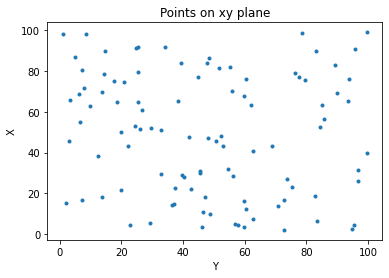

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

# read data
coordinates = np.genfromtxt("coordinates.csv", delimiter=',', skip_header=1)
print(type(coordinates))

fig, ax = plt.subplots()
ax.scatter(coordinates[:, 1], coordinates[:,0], marker='.')  # geodetic plane, X is headed up, Y is heading right
ax.set_title("Points on xy plane")
ax.set_xlabel("Y")  # geodetic plane, X is headed up, Y is heading right
ax.set_ylabel("X")
plt.show()

**Exercise 3**

Define  a polynomial $P(x)$. Compute its values for 100 points in the defined interval. Store the results ($x$ and $P(x)$) in a text file with two columns, separated with a tab. Each pair should be in a separate line.

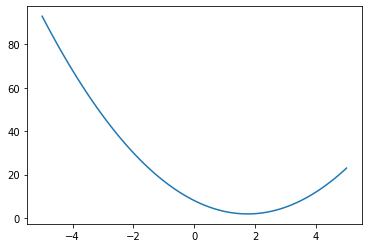

(100,)


In [7]:
x = np.linspace(-5, 5, 100)

# function polyval evaluates a polynomial at a point x for coefficients p
# we solve the task for P(x) = 2x**2 - 7*x + 8
p = [2, -7, 8]
px = np.polyval(p, x)

#check the polynomial
plt.plot(x, px)
plt.show()

# check shape of x
print(x.shape)
# cannot hstack 1 dimension arrays, expanding dimensions
x = x[:, np.newaxis]
px = px[:, np.newaxis]

data = np.hstack((x, px))

# save data
np.savetxt("polynomial.txt", np.hstack((x, px)), delimiter='\t')  # newline added automatically

**Exercise 4**

Read data in the file new_york.csv. Skip the header. Change missing values (-99) to NaN. Compute an average of temperature and precipitation over the years.

In [11]:
import numpy as np

# header has 7 lines
data = np.genfromtxt("new_york.csv", delimiter=",", skip_header=7)
# we could use parameter missing_values in genfromtxt if missing value was defined as a string, but it isn't
# replace -99 manually
# for all rows where -99 appears, replace with np.nan
data[data ==  -99] = np.nan
print(data[480:500, :]) # line 490 contained missing data, minus 7 lines of header -> ~483

mean_temp = np.mean(data[:, 1])  # in Fahrenheits
mean_rain = np.mean(data[:, 2])  # in inches
print(mean_temp, mean_rain) # mean_temp returns nan, because there where nans in the column

# skip nans while computing the mean
mean_temp_no_nans = np.nanmean(data[:, 1])
print(mean_temp_no_nans)

[[1.97001e+05 2.43000e+01 6.70000e-01]
 [1.97002e+05 3.22000e+01 4.52000e+00]
 [1.97003e+05         nan 4.19000e+00]
 [1.97004e+05 5.13000e+01 3.48000e+00]
 [1.97005e+05 6.32000e+01 3.34000e+00]
 [1.97006e+05 7.00000e+01 2.27000e+00]
 [1.97007e+05 7.63000e+01 2.19000e+00]
 [1.97008e+05 7.68000e+01 2.47000e+00]
 [1.97009e+05 7.00000e+01 1.74000e+00]
 [1.97010e+05 5.81000e+01 2.48000e+00]
 [1.97011e+05 4.76000e+01 5.14000e+00]
 [1.97012e+05 3.36000e+01 2.82000e+00]
 [1.97101e+05 2.61000e+01 2.67000e+00]
 [1.97102e+05 3.43000e+01 5.33000e+00]
 [1.97103e+05 3.93000e+01 3.80000e+00]
 [1.97104e+05 4.99000e+01 2.96000e+00]
 [1.97105e+05 6.05000e+01 4.24000e+00]
 [1.97106e+05 7.34000e+01 2.31000e+00]
 [1.97107e+05 7.70000e+01 7.20000e+00]
 [1.97108e+05 7.51000e+01 9.37000e+00]]
nan 3.871955514365153
54.39554730983302


**Exercise 5**

Using the file sonnets.txt, save each sonnet to a separate file. Luckily for you, each sonnet has 14 lines :)

In [13]:
# before running this cell, create a dictionary called sonnets to save the sonnets there
import os  # import for creating a path to a folder in a system-independent way

# the whole file can be divided like this: each sonnet has 17 lines:newline title, newline, 14 lines
# there are 6 lines at the beginning of the file with title and author

with open("sonnets.txt") as f:
    for i in range(6):
        f.readline()
    l = f.readlines() # skip 6 lines

while l:  # while we have some lines in our list 
    # take the first line from a list of lines and delete it
    line = l.pop(0)
    words = line.strip().split()
    if len(words) == 0:
        continue #skip empty lines
    elif len(words) == 1:  # sonnet title
        # new filename:
        fname = words[0] + ".txt" # fname is a current sonnet filename
        file_path = os.path.join("sonnets", fname)
        sonnet_file = open(file_path, "w")
    else:
        # cannot append data to a non-existing file, so we needed to write data with w first 
        # open a file in a folder "sonnets"
        file_path = os.path.join("sonnets", fname)
        sonnet_file = open(file_path, "a")
    sonnet_file.write(line)
    sonnet_file.close()


In [14]:
with open("sonnets.txt") as f:
    for i in range(6):
        f.readline()
    l = f.readlines() # skip 6 lines
    
# using a for loop
for line in l:  # while we have some lines in our list 
    words = line.strip().split()
    if len(words) == 0:
        continue # skip empty lines
    elif len(words) == 1:  # sonnet title
        # new filename:
        fname = words[0] + ".txt" # fname is a current sonnet filename
        file_path = os.path.join("sonnets2", fname)  # a directory needs to exist first 
        sonnet_file = open(file_path, "w")
    else:
        # cannot append data to a non-existing file, so we needed to write data with w first 
        # open a file in a folder "sonnets"
        file_path = os.path.join("sonnets2", fname)
        sonnet_file = open(file_path, "a")
    sonnet_file.write(line)
    sonnet_file.close()

FileNotFoundError: [Errno 2] No such file or directory: 'sonnets2/I.txt'

**Exercise 6**

Count the words in a sonnets.txt.

In [15]:
word_count = 0

with open("sonnets.txt") as f:
    for line in f:
        # read text line by line, split the words with spaces, count number of words in a line
        # this is a bit sloppy, since we count in the titles of sonnets as well
        words = line.split()
        word_count += len(words)
        
# the number is not exact, the sonnet titles where also included
print(f"There are {word_count} words in Shakespeare sonnets.") 

There are 17675 words in Shakespeare sonnets.


**Exercise 7**

Read the file sonnets.txt. Count the number of appearance of each word in a file. You can skip punctuation (`word` and `word!` and `WORD` is the same word). Save results to a text file. 

In [16]:
word_count = {} # empty dictionary to store the words as keys and number of occurences as values

with open("sonnets.txt") as f:
    for line in f:
        # read text line by line, split the words with spaces, count number of words in a line
        words = line.split()
        # clean the words in line using list comprehension, every word is casted to lower case, 
        # punctuation is stripped
        # rstrip removes the trailing characters (any of the listed), double quotes is introduced with \ sign
        words = [word.lower().rstrip(".,:;?!-\"'") for word in words]
        for word in words: # increment the number of word appearances
            # dictionary method get returns default value (here: 0) if the key does not exist, and value if key exists
            word_count[word] = word_count.get(word, 0) + 1

print(word_count)

{'the': 436, 'sonnets': 1, 'by': 94, 'william': 1, 'shakespeare': 1, 'i': 341, 'from': 81, 'fairest': 5, 'creatures': 2, 'we': 15, 'desire': 11, 'increase': 4, 'that': 320, 'thereby': 2, "beauty's": 18, 'rose': 6, 'might': 26, 'never': 15, 'die': 12, 'but': 163, 'as': 121, 'riper': 2, 'should': 44, 'time': 53, 'decease': 3, 'his': 107, 'tender': 7, 'heir': 3, 'bear': 12, 'memory': 8, 'thou': 233, 'contracted': 2, 'to': 409, 'thine': 44, 'own': 30, 'bright': 11, 'eyes': 53, "feed'st": 1, 'thy': 280, "light's": 1, 'flame': 3, 'with': 181, 'self-substantial': 1, 'fuel': 1, 'making': 12, 'a': 163, 'famine': 1, 'where': 41, 'abundance': 4, 'lies': 12, 'self': 36, 'foe': 1, 'sweet': 55, 'too': 18, 'cruel': 8, 'art': 51, 'now': 45, "world's": 5, 'fresh': 7, 'ornament': 5, 'and': 490, 'only': 6, 'herald': 1, 'gaudy': 1, 'spring': 5, 'within': 11, 'bud': 2, 'buriest': 1, 'content': 2, 'churl': 2, "mak'st": 2, 'waste': 7, 'in': 321, 'niggarding': 1, 'pity': 8, 'world': 26, 'or': 79, 'else': 5, '

**Exercise 8**

Using one of the formatting methods, print the table as in example below and save it to a file oscars.txt

In [19]:
year = [1959, 1997, 2003, 1961]
movie = ["Ben Hur", "Titanic", "LOTR: The Return of the King", "West Side Story"]
oscars = [11, 11, 11, 10]

In [33]:
with open("oscars.txt", "w") as f:
    f.write(47 * "-" + "\n")
    # header
    header = ["Year", "Movie title", "Oscars"]
    # < aligns left, ^ aligns to center
    f.write(f"|{header[0]:<6s}|{header[1]:^29s}|{header[2]:^8s}|\n")
    f.write(47 * "*" + "\n")
    for y, m, o in zip(year, movie, oscars):
        # < aligns left, .> adds dots before the number (padding + align)
        f.write(f"|{y:<6d}|{m:29s}|{o:.>8d}|\n")
    
    f.write(47 * "-" + "\n")

In [20]:
# or, using print
with open("oscars_print.txt", "w") as f:
    print(47 * "-", file=f)
    # header
    header = ["Year", "Movie title", "Oscars"]
    # < aligns left, ^ aligns to center
    print(f"|{header[0]:<6s}|{header[1]:^29s}|{header[2]:^8s}|", file=f)
    print(47 * "*", file=f)
    for y, m, o in zip(year, movie, oscars):
        # < aligns left, .> adds dots before the number (padding + align)
        print(f"|{y:<6d}|{m:29s}|{o:.>8d}|", file=f)
    
    print(47 * "-", file=f, end="") # change end, to avoid a newline in the end

**Exercise 9**

Read a file pi_million.txt including million digits of a pi number. Check if those digits contain your date of birth sequence given as `yymmdd`.

In [23]:
f = open("pi_million.txt")
pi_digits = f.read()
f.close()

#birthday = "001201" # born in December 1, 2000, not included
birthday = "640628" # born in June 28, 1964, included

if birthday in pi_digits:
    print("My birthday is included in the first million digits of pi!")
else:
    print("My birthday is not included in the first million digits of pi :(")


My birthday is included in the first million digits of pi!


**Exercise 10** Bonus exercise

One of the previous classes required to count the letter occurence in the text, rewrite the solution, this time reading the text from a file.

In [17]:
# Solution is similar to counting words in ex.7, 
# instead of creating a dictionary for words we create a dictionary for letters.

letter_count = {} # empty dictionary to store the words as keys and number of occurences as values

with open("sonnets.txt") as f:
    for line in f:
        # check the elements in a line, do not count punctuation or spaces
        for character in line.lower(): # increment the number of word appearances
            # unify characters case with lower
            if character not in ".,:;?!-\"' 1234567890)(":
                letter_count[character] = letter_count.get(character, 0) + 1

print(letter_count)

{'t': 7210, 'h': 5064, 'e': 9028, 's': 4994, 'o': 5710, 'n': 4522, '\n': 2625, 'b': 1228, 'y': 1984, 'w': 1898, 'i': 4895, 'l': 3161, 'a': 4940, 'm': 2095, 'k': 552, 'p': 1012, 'r': 4181, 'f': 1663, 'c': 1402, 'u': 2321, 'd': 2765, 'g': 1357, 'v': 1002, 'z': 21, 'x': 285, 'q': 51, 'j': 69}
